In [71]:
import geopandas as gpd
import pandas as pd

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import plotly.express as px

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')


In [61]:
gdf = gdf_2022
hydro = gdf[gdf['Vientiane trucking production cost'] < 3]
hydro['hydro'].sum()

np.float64(1862.49)

In [ ]:
2022: 1862.49
2025: 1929.2499999999995
2030: 3582.0499999999993
post_2030: 5977.139999999999

# 0 Average across time

### 0.1 Ratio total

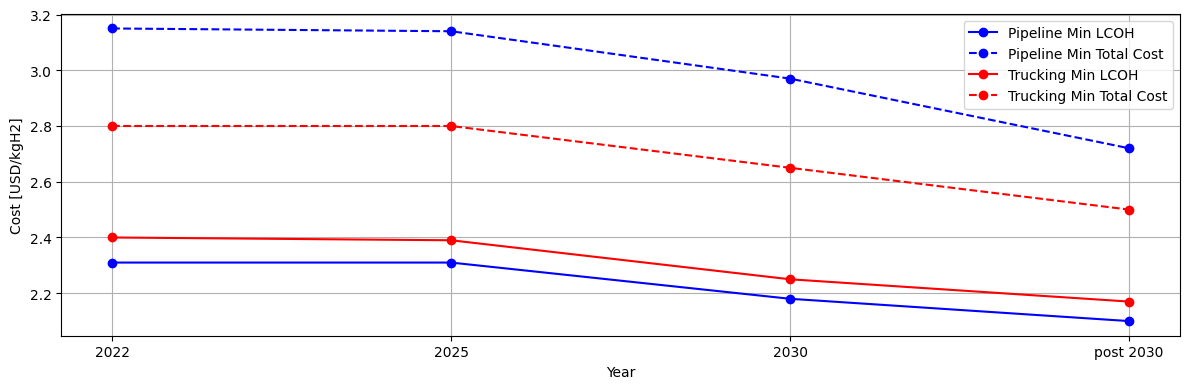

In [91]:
import matplotlib.pyplot as plt

# Data
years = ['2022', '2025', '2030', 'post 2030']

pipeline_min_costs = {
    'Min LCOH': [2.31, 2.31, 2.18, 2.10],
    'Min Total Cost': [3.15, 3.14, 2.97, 2.72],
}

pipeline_avg_costs = {
    'Avg LCOH': [11.12, 10.31, 8.66, 7.59],
    'Avg Total Cost': [12.47, 11.61, 9.88, 8.80],
}

trucking_min_costs = {
    'Min LCOH': [2.40, 2.39, 2.25, 2.17],
    'Min Total Cost': [2.80, 2.80, 2.65, 2.50],
}

trucking_avg_costs = {
    'Avg LCOH': [11.19, 10.37, 8.70, 7.63],
    'Avg Total Cost': [11.62, 10.80, 9.12, 8.05],
}

# Create the figure and axes
fig, ax = plt.subplots(figsize=(12, 4))

# Plotting the minimum costs
ax.plot(years, pipeline_min_costs['Min LCOH'], marker='o', linestyle='-', color='blue', label='Pipeline Min LCOH')
ax.plot(years, pipeline_min_costs['Min Total Cost'], marker='o', linestyle='--', color='blue', label='Pipeline Min Total Cost')
ax.plot(years, trucking_min_costs['Min LCOH'], marker='o', linestyle='-', color='red', label='Trucking Min LCOH')
ax.plot(years, trucking_min_costs['Min Total Cost'], marker='o', linestyle='--', color='red', label='Trucking Min Total Cost')
# Add labels, title, and legend
ax.set_xlabel('Year')
ax.set_ylabel('Cost [USD/kgH2]')
# ax.set_title('LCOH and Total Cost Comparison: Pipeline vs Trucking')
ax.legend(loc='upper right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


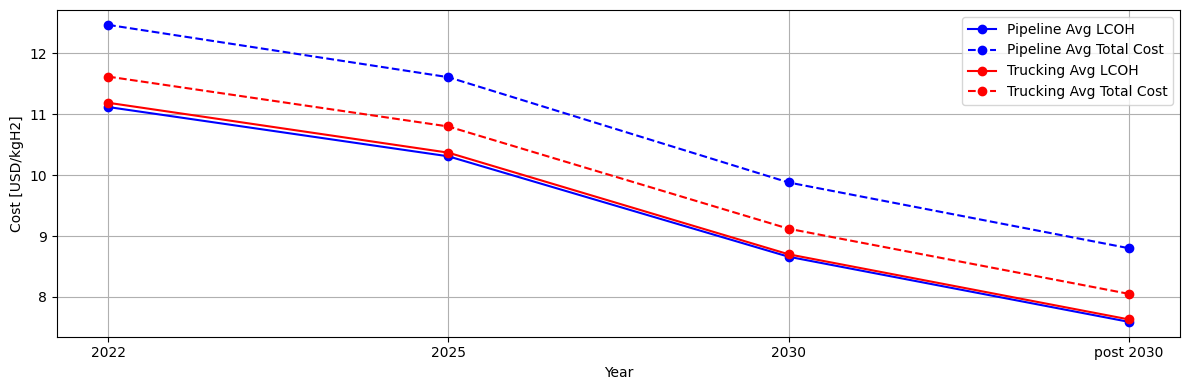

In [92]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(years, pipeline_avg_costs['Avg LCOH'], marker='o', linestyle='-', color='blue', label='Pipeline Avg LCOH')
ax.plot(years, pipeline_avg_costs['Avg Total Cost'], marker='o', linestyle='--', color='blue', label='Pipeline Avg Total Cost')
ax.plot(years, trucking_avg_costs['Avg LCOH'], marker='o', linestyle='-', color='red', label='Trucking Avg LCOH')
ax.plot(years, trucking_avg_costs['Avg Total Cost'], marker='o', linestyle='--', color='red', label='Trucking Avg Total Cost')
ax.set_xlabel('Year')
ax.set_ylabel('Cost [USD/kgH2]')
# ax.set_title('LCOH and Total Cost Comparison: Pipeline vs Trucking')
ax.legend(loc='upper right')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

### 0.2 Ratio domestic

# 1 Min Cost Hexagon

In [75]:
min_hex_2022 = gdf_2022.loc[gdf_2022['Vientiane pipeline production cost'].idxmin()]
min_hex_2025 = gdf_2025.loc[gdf_2025['Vientiane pipeline production cost'].idxmin()]
min_hex_2030 = gdf_2030.loc[gdf_2030['Vientiane pipeline production cost'].idxmin()]
min_hex_post_2030 = gdf_post_2030.loc[gdf_post_2030['Vientiane pipeline production cost'].idxmin()]

In [76]:
import plotly.graph_objects as go

# Define the transport type and relevant columns
transport = 'pipeline'

columns = [
    f'Vientiane LCOH - {transport} battery costs portion',
    f'Vientiane LCOH - {transport} electrolyzer portion',
    f'Vientiane LCOH - {transport} H2 storage portion',
    f'Vientiane LCOH - {transport} wind portion',
    f'Vientiane LCOH - {transport} solar portion',
    f'Vientiane LCOH - {transport} hydro portion'
]

# Extract the cost values for each year
costs_2022 = [min_hex_2022[col] for col in columns]
costs_2025 = [min_hex_2025[col] for col in columns]
costs_2030 = [min_hex_2030[col] for col in columns]
# costs_post_2030 = [min_hex_post_2030[col] for col in columns]

# Create a DataFrame for easier plotting (optional, if needed)
comparison_df = pd.DataFrame({
    '2022': costs_2022,
    '2025': costs_2025,
    '2030': costs_2030,
    # 'Post-2030': costs_post_2030
}, index=[col.split(f" - {transport} ")[1].replace(' portion', '') for col in columns])

# Plot the comparison
fig = go.Figure()

# years = ['2022', '2025', '2030', 'Post-2030']
years = ['2022', '2025', '2030']
# cost_lists = [costs_2022, costs_2025, costs_2030, costs_post_2030]
cost_lists = [costs_2022, costs_2025, costs_2030]

for i, year in enumerate(years):
    fig.add_trace(go.Bar(
        name=year,
        x=comparison_df.index,
        y=cost_lists[i],
        text=[f"{v:.2f} USD/kg" for v in cost_lists[i]],
        marker=dict(color=px.colors.qualitative.Plotly[i])
    ))

# Update layout
fig.update_layout(
    barmode='group',
    title=f"Comparison of LCOH Cost Breakdown Over Years for {transport.capitalize()} - Min-Cost Hexagon",
    xaxis_title="Cost Portions",
    yaxis_title="Cost [USD/kg]",
    showlegend=True,
    width=900,
    height=600
)

fig.show()


# 2 Geospatial Visualisation

### 2.1 Show individually

In [151]:
import geopandas as gpd

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Find the min-cost hexagon in each year
min_hex_2022 = gdf_2022.loc[gdf_2022['Vientiane pipeline total cost'].idxmin()]
min_hex_2025 = gdf_2025.loc[gdf_2025['Vientiane pipeline total cost'].idxmin()]
min_hex_2030 = gdf_2030.loc[gdf_2030['Vientiane pipeline total cost'].idxmin()]
min_hex_post_2030 = gdf_post_2030.loc[gdf_post_2030['Vientiane pipeline total cost'].idxmin()]


In [152]:
type(min_hex_2022)

pandas.core.series.Series

In [117]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString

def plot_yearly_min_cost_hexagon_with_demand(hexagon, provinces, demand_center_lat, demand_center_lon, demand_kg, year, save_path):
    """
    Plots the min-cost hexagon for a specific year, province borders, and the demand center with demand information.
    
    Parameters:
    - hexagon: The GeoSeries of the min-cost hexagon.
    - provinces: GeoDataFrame for province boundaries.
    - demand_center_lat: Latitude of the demand center.
    - demand_center_lon: Longitude of the demand center.
    - demand_kg: The demand in kilograms of hydrogen.
    - year: The year being visualized.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Convert the hexagon geometry to a GeoSeries and set CRS
    hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.5)


    # Plot the min-cost hexagon in green
    hexagon_geo.to_crs(crs.proj4_init).plot(
        ax=ax, color='green', edgecolor='black', linewidth=0.5)

    # Plot the demand center
    demand_center = gpd.GeoSeries([Point(demand_center_lon, demand_center_lat)], crs=geo_crs)
    demand_center.to_crs(crs.proj4_init).plot(
        ax=ax, color='red', marker='*', markersize=100, label=f'Demand Center ({demand_kg} kgH2)')

    plt.legend()
    plt.title(f"Min-Cost Hexagon and Demand Center for {year}")
    plt.show()

    # Save the figure
    # fig.savefig(save_path, dpi=300, bbox_inches='tight')
    # plt.close(fig)


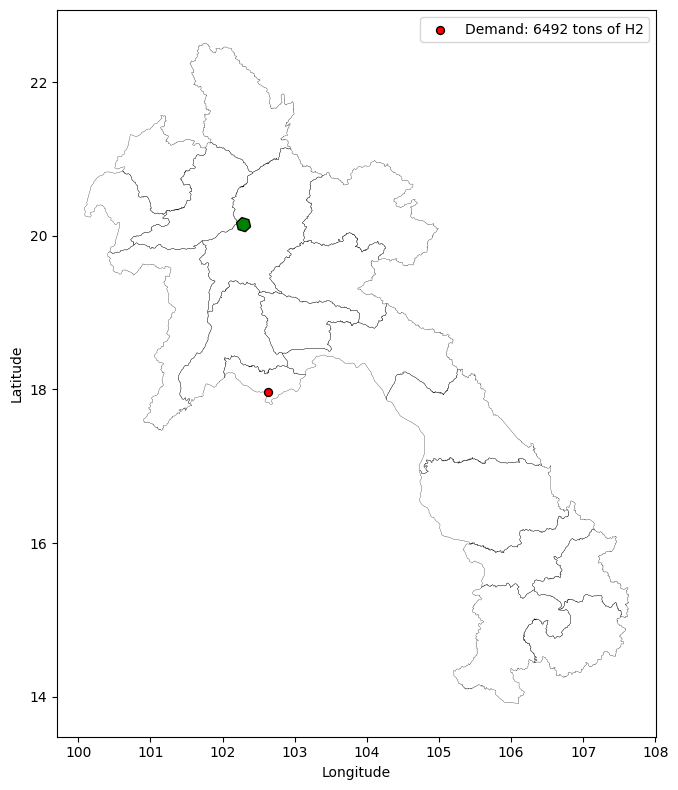

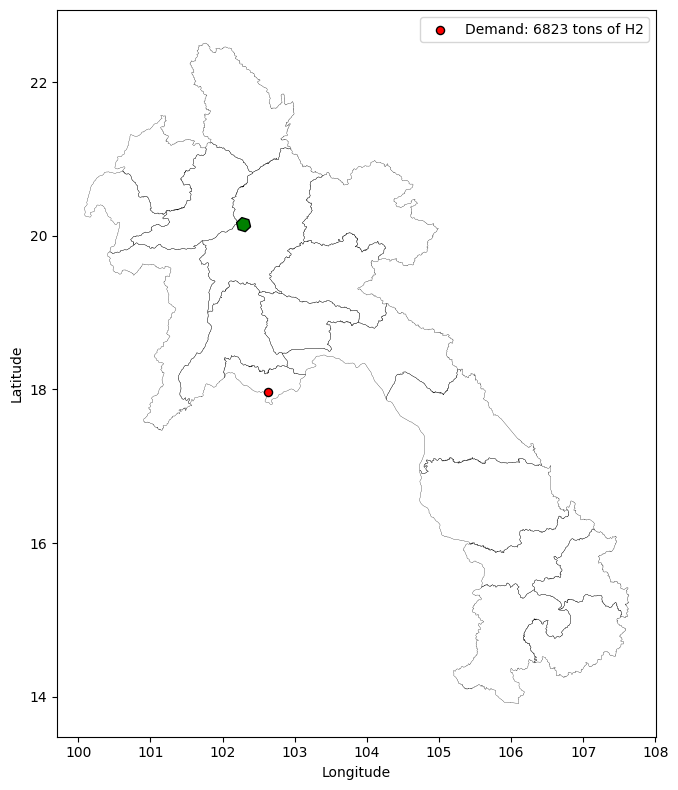

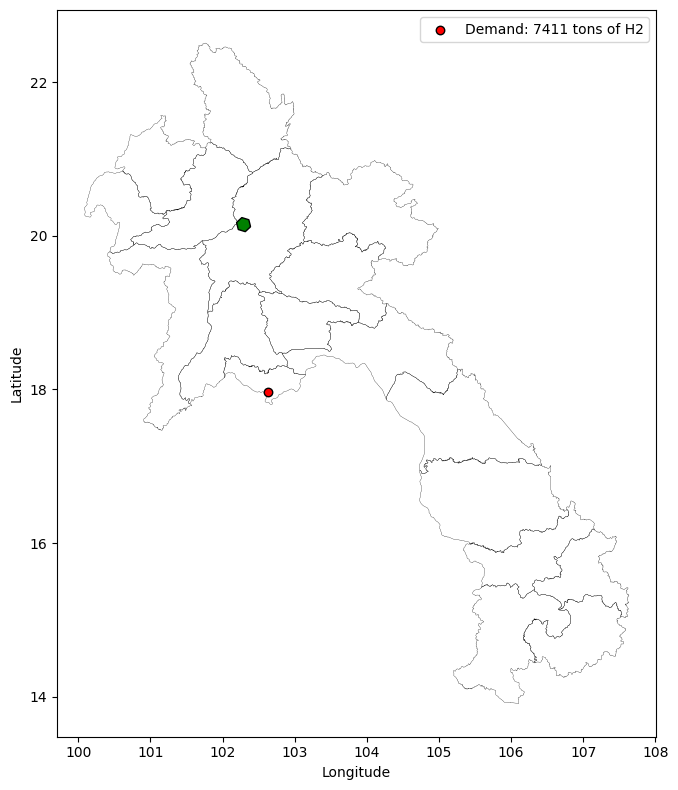

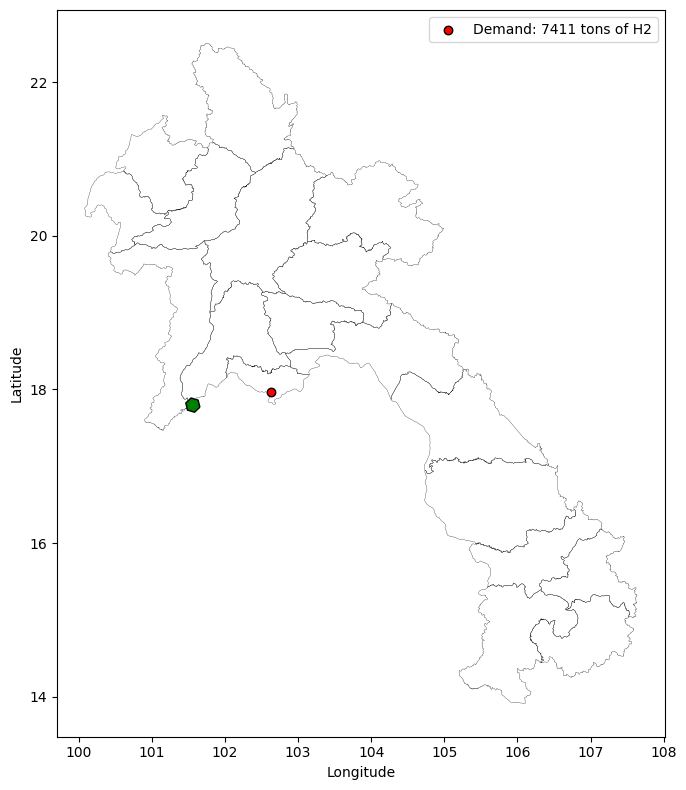

In [154]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Find the min-cost hexagon in each year and convert it back to a GeoDataFrame
min_hex_2022 = gdf_2022.loc[[gdf_2022['Vientiane trucking total cost'].idxmin()]]
min_hex_2025 = gdf_2025.loc[[gdf_2025['Vientiane trucking total cost'].idxmin()]]
min_hex_2030 = gdf_2030.loc[[gdf_2030['Vientiane trucking total cost'].idxmin()]]
min_hex_post_2030 = gdf_post_2030.loc[[gdf_post_2030['Vientiane trucking total cost'].idxmin()]]

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates and hydrogen demand
demand_center_lat, demand_center_lon = 17.97,102.63   # Replace with actual coordinates

# Define the demand in kg for each year
demand_kg_per_year = {
    2022: 6492,  # Replace with actual demand in kg for 2022
    2025: 6823,  # Replace with actual demand in kg for 2025
    2030: 7411,  # Replace with actual demand in kg for 2030
    'Post-2030': 7411  # Replace with actual demand in kg for Post-2030
}

# Define the minimum cost hexagons for each year
min_hexagons = {
    2022: min_hex_2022,
    2025: min_hex_2025,
    2030: min_hex_2030,
    'Post-2030': min_hex_post_2030
}

# Function to plot and save for each year
def plot_yearly_min_cost_hexagon_with_demand(min_hex, provinces, lat, lon, demand, year, filename):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot province boundaries
    provinces.plot(ax=ax, color='none', edgecolor='black', linewidth=0.2)
    
    # Plot the minimum cost hexagons
    min_hex.plot(ax=ax, color='green', edgecolor='black')
    
    # Plot the demand center with a larger size
    ax.scatter(lon, lat, s=demand/200, color='red', edgecolor='black', label=f'Demand: {demand} tons of H2')
    
    # Customize the plot
    # ax.set_title(f'Minimum Cost Hexagons and Hydrogen Demand Center ({year})')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    
    # Save the plot
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Loop through each year and plot
for year, demand_kg in demand_kg_per_year.items():
    plot_yearly_min_cost_hexagon_with_demand(min_hexagons[year], provinces, demand_center_lat, demand_center_lon, demand_kg, year, f'min_total_cost_hexag on_{year}.png')


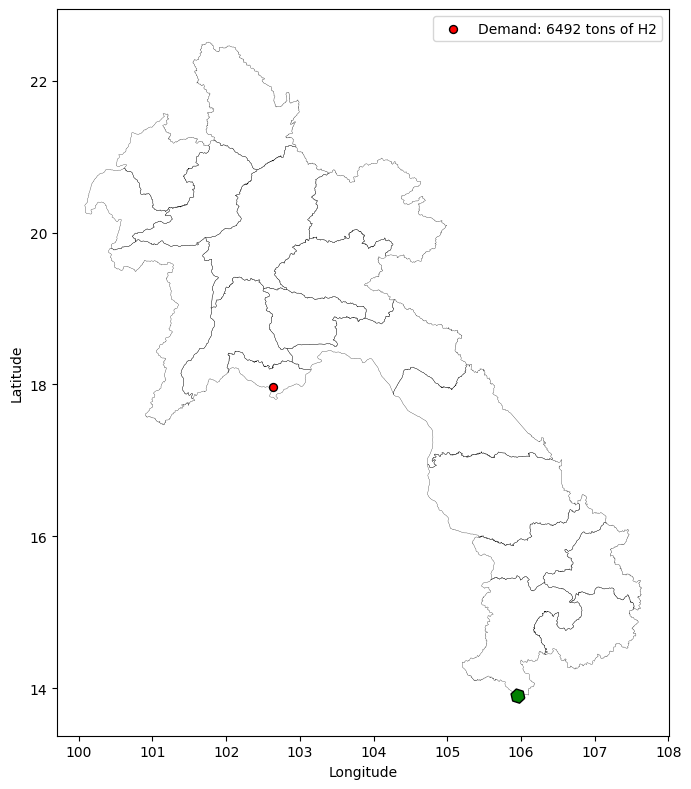

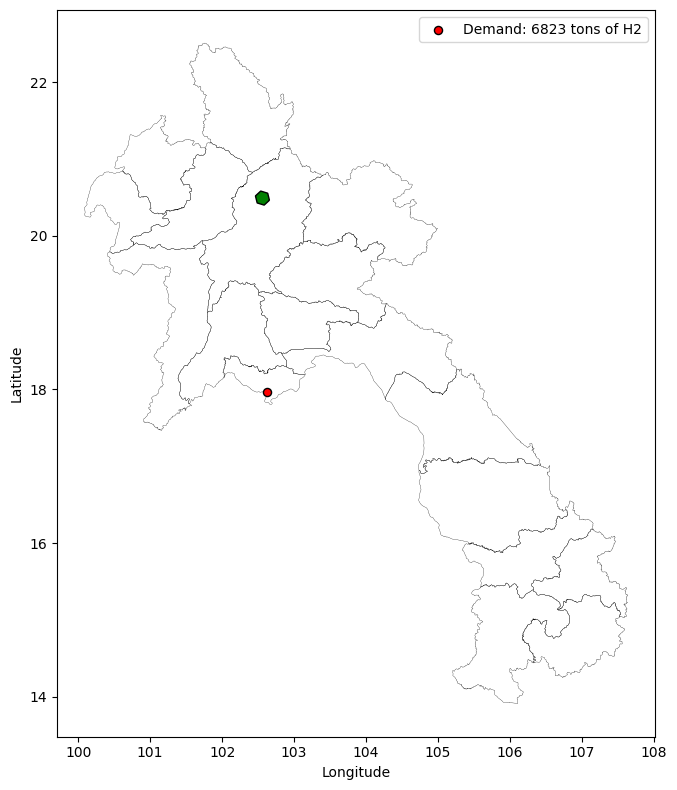

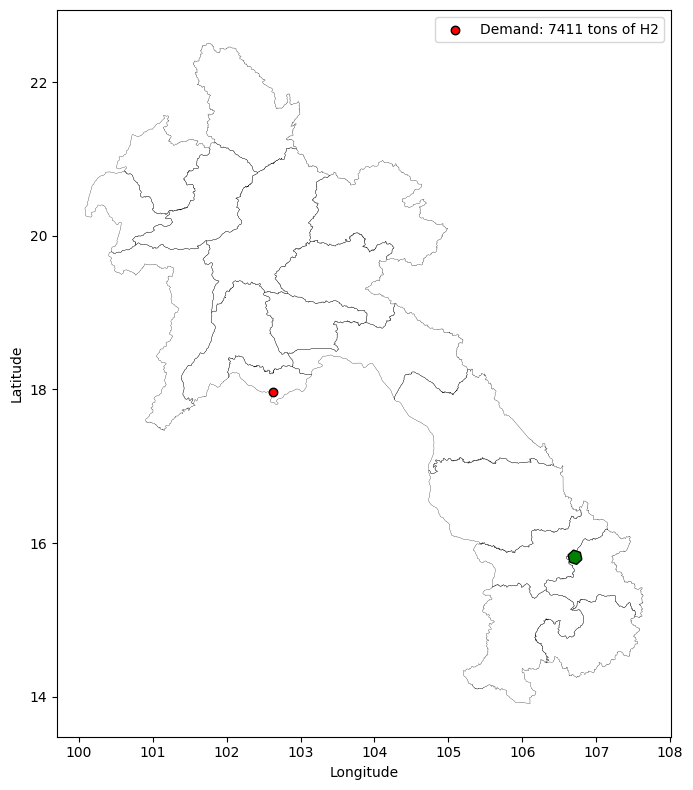

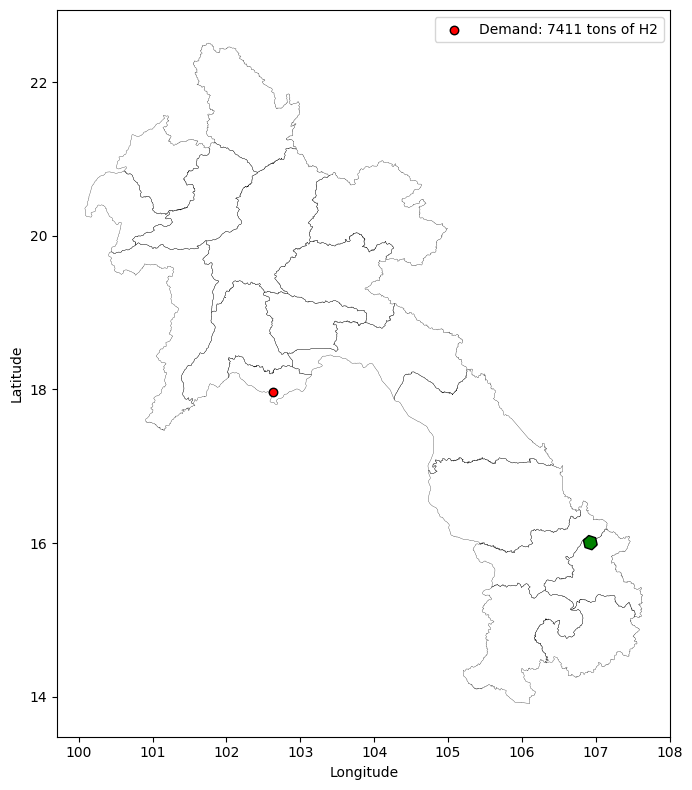

In [158]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define variables to switch between trucking/pipeline and total/production cost
mode = 'trucking'  # Set to 'trucking' or 'pipeline'
cost_type = 'production cost'  # Set to 'total cost' or 'production cost'

# Construct the column name based on the mode and cost type
column_name = f'Vientiane {mode} {cost_type}'

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Find the min-cost hexagon in each year and convert it back to a GeoDataFrame
min_hex_2022 = gdf_2022.loc[[gdf_2022[column_name].idxmin()]]
min_hex_2025 = gdf_2025.loc[[gdf_2025[column_name].idxmin()]]
min_hex_2030 = gdf_2030.loc[[gdf_2030[column_name].idxmin()]]
min_hex_post_2030 = gdf_post_2030.loc[[gdf_post_2030[column_name].idxmin()]]

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates and hydrogen demand
demand_center_lat, demand_center_lon = 17.97, 102.63  # Replace with actual coordinates

# Define the demand in kg for each year
demand_kg_per_year = {
    2022: 6492,  # Replace with actual demand in kg for 2022
    2025: 6823,  # Replace with actual demand in kg for 2025
    2030: 7411,  # Replace with actual demand in kg for 2030
    'Post-2030': 7411  # Replace with actual demand in kg for Post-2030
}

# Define the minimum cost hexagons for each year
min_hexagons = {
    2022: min_hex_2022,
    2025: min_hex_2025,
    2030: min_hex_2030,
    'Post-2030': min_hex_post_2030
}

# Function to plot and save for each year
def plot_yearly_min_cost_hexagon_with_demand(min_hex, provinces, lat, lon, demand, year, filename):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot province boundaries
    provinces.plot(ax=ax, color='none', edgecolor='black', linewidth=0.2)
    
    # Plot the minimum cost hexagons
    min_hex.plot(ax=ax, color='green', edgecolor='black')
    
    # Plot the demand center with a larger size
    ax.scatter(lon, lat, s=demand/200, color='red', edgecolor='black', label=f'Demand: {demand} tons of H2')
    
    # Customize the plot
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    
    # Save the plot
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Loop through each year and plot
for year, demand_kg in demand_kg_per_year.items():
    plot_yearly_min_cost_hexagon_with_demand(min_hexagons[year], provinces, demand_center_lat, demand_center_lon, demand_kg, year, f'min_{mode}_{cost_type}_hexagon_{year}.png')


### 2.2 Show in one plot

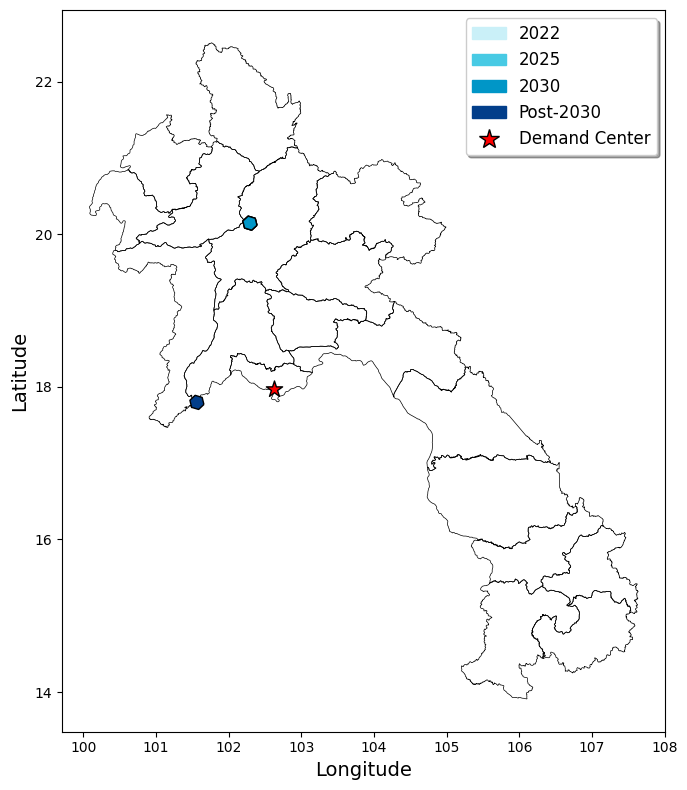

In [175]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define variables to switch between trucking/pipeline and total/production cost
mode = 'trucking'  # Set to 'trucking' or 'pipeline'
cost_type = 'total cost'  # Set to 'total cost' or 'production cost'

# Construct the column name based on the mode and cost type
column_name = f'Vientiane {mode} {cost_type}'

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Find the min-cost hexagon in each year and convert it back to a GeoDataFrame
min_hex_2022 = gdf_2022.loc[[gdf_2022[column_name].idxmin()]]
min_hex_2025 = gdf_2025.loc[[gdf_2025[column_name].idxmin()]]
min_hex_2030 = gdf_2030.loc[[gdf_2030[column_name].idxmin()]]
min_hex_post_2030 = gdf_post_2030.loc[[gdf_post_2030[column_name].idxmin()]]

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates (adjust as needed)
demand_center_lat, demand_center_lon = 17.97, 102.63  # Replace with actual coordinates

# Define the minimum cost hexagons for each year
min_hexagons = {
    2022: min_hex_2022,
    2025: min_hex_2025,
    2030: min_hex_2030,
    'Post-2030': min_hex_post_2030
}

# Function to plot all hexagons on the same plot with different colors
def plot_min_cost_hexagons_across_years(min_hexagons, provinces, lat, lon):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot province boundaries
    provinces.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Define colors for each year
    colors = {
        2022: '#caf0f8',
        2025: '#48cae4',
        2030: '#0096c7',
        'Post-2030': '#023e8a'
    }
    
    # Plot the minimum cost hexagons for each year
    for year, hexagon in min_hexagons.items():
        hexagon.plot(ax=ax, color=colors[year], edgecolor='black')

    # Plot the demand center
    ax.scatter(lon, lat, s=150, color='red', edgecolor='black', marker='*', label='Demand Center')

    
    # Manually create legend handles
    legend_handles = [
        mpatches.Patch(color=colors[2022], label='2022'),
        mpatches.Patch(color=colors[2025], label='2025'),
        mpatches.Patch(color=colors[2030], label='2030'),
        mpatches.Patch(color=colors['Post-2030'], label='Post-2030'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=15, markeredgecolor='black', label='Demand Center')
    ]
    
    # Customize the plot with larger fonts
    # ax.set_title(f'Minimum Cost Hexagons Across Years ({mode.capitalize()} - {cost_type.capitalize()})', fontsize=18)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
    # Customize legend with larger font size
    ax.legend(handles=legend_handles, fontsize=12, loc='upper right', frameon=True, shadow=True)
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f'min_{mode}_{cost_type}_hexagons_across_years.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot all hexagons across years
plot_min_cost_hexagons_across_years(min_hexagons, provinces, demand_center_lat, demand_center_lon)


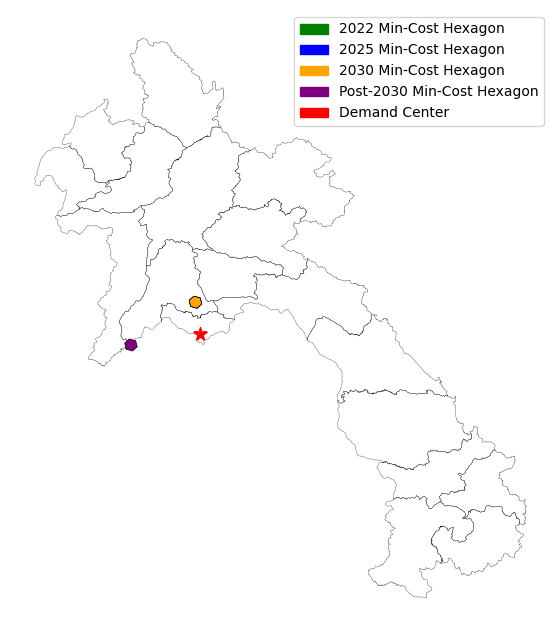

In [115]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString
from matplotlib.patches import Patch

def plot_min_cost_hexagons_over_years(hexagons, provinces, demand_center_lat, demand_center_lon, save_path):
    """
    Plots the min-cost hexagons for different years, province borders, and the demand center.
    
    Parameters:
    - hexagons: A dictionary with years as keys and GeoSeries of min-cost hexagons as values.
    - provinces: GeoDataFrame for province boundaries.
    - demand_center_lat: Latitude of the demand center.
    - demand_center_lon: Longitude of the demand center.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Define colors for each year
    colors = {
        2022: 'green',
        2025: 'blue',
        2030: 'orange',
        'Post-2030': 'purple'
    }

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.2)

    # Plot each year's hexagon with a different color and line connecting to the demand center
    for year, hexagon in hexagons.items():
        hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)
        
        # Plot the hexagon
        hexagon_geo.to_crs(crs.proj4_init).plot(
            ax=ax, color=colors[year], edgecolor='black', linewidth=0.5)


    # Plot the demand center once
    demand_center = gpd.GeoSeries([Point(demand_center_lon, demand_center_lat)], crs=geo_crs)
    demand_center.to_crs(crs.proj4_init).plot(
        ax=ax, color='red', marker='*', markersize=100, label='Demand Center')

    # Create custom legend
    legend_patches = [Patch(color=color, label=f'{year} Min-Cost Hexagon') for year, color in colors.items()]
    legend_patches.append(Patch(color='red', label='Demand Center'))

    plt.legend(handles=legend_patches)
    # plt.title("Min-Cost Hexagons and Demand Center Across Years")
    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Example usage:

# Load the GeoJSON files and find min-cost hexagons as before
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

min_hex_2022 = gdf_2022.loc[gdf_2022['Vientiane pipeline total cost'].idxmin()]
min_hex_2025 = gdf_2025.loc[gdf_2025['Vientiane pipeline total cost'].idxmin()]
min_hex_2030 = gdf_2030.loc[gdf_2030['Vientiane pipeline total cost'].idxmin()]
min_hex_post_2030 = gdf_post_2030.loc[gdf_post_2030['Vientiane pipeline total cost'].idxmin()]

# Combine the hexagons into a dictionary
hexagons = {
    2022: min_hex_2022,
    2025: min_hex_2025,
    2030: min_hex_2030,
    'Post-2030': min_hex_post_2030
}

# Example province boundaries GeoDataFrame (assuming already loaded)
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates (latitude and longitude)
demand_center_lat, demand_center_lon = 17.97, 102.63  # Replace with actual coordinates

# Plot and save
plot_min_cost_hexagons_over_years(hexagons, provinces, demand_center_lat, demand_center_lon, 'min_cost_hexagons_over_years.png')


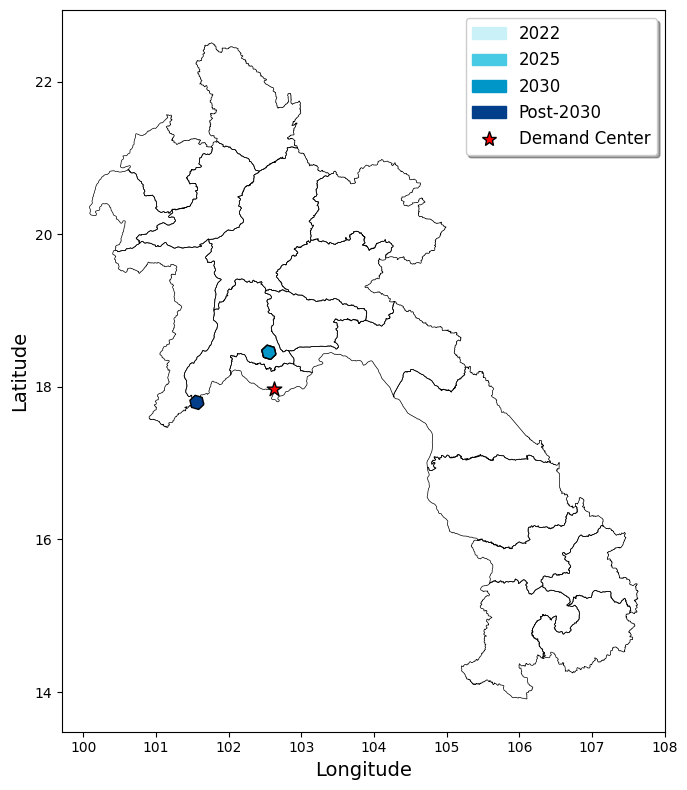

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Define variables to switch between trucking/pipeline and total/production cost
mode = 'pipeline'  # Set to 'trucking' or 'pipeline'
cost_type = 'total cost'  # Set to 'total cost' or 'production cost'

# Construct the column name based on the mode and cost type
column_name = f'Vientiane {mode} {cost_type}'

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Find the min-cost hexagon in each year and convert it back to a GeoDataFrame
min_hex_2022 = gdf_2022.loc[[gdf_2022[column_name].idxmin()]]
min_hex_2025 = gdf_2025.loc[[gdf_2025[column_name].idxmin()]]
min_hex_2030 = gdf_2030.loc[[gdf_2030[column_name].idxmin()]]
min_hex_post_2030 = gdf_post_2030.loc[[gdf_post_2030[column_name].idxmin()]]

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates (adjust as needed)
demand_center_lat, demand_center_lon = 17.97, 102.63  # Replace with actual coordinates

# Define the minimum cost hexagons for each year
min_hexagons = {
    2022: min_hex_2022,
    2025: min_hex_2025,
    2030: min_hex_2030,
    'Post-2030': min_hex_post_2030
}

# Function to plot all hexagons on the same plot with different colors
def plot_min_cost_hexagons_across_years(min_hexagons, provinces, lat, lon):
    # Initialize the plot
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot province boundaries
    provinces.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Define colors for each year
    colors = {
        2022: '#caf0f8',
        2025: '#48cae4',
        2030: '#0096c7',
        'Post-2030': '#023e8a'
    }
    
    # Plot the minimum cost hexagons for each year
    for year, hexagon in min_hexagons.items():
        hexagon.plot(ax=ax, color=colors[year], edgecolor='black')

    # Plot the demand center
    ax.scatter(lon, lat, s=120, color='red', edgecolor='black', marker='*', label='Demand Center')

    
    # Manually create legend handles
    legend_handles = [
        mpatches.Patch(color=colors[2022], label='2022'),
        mpatches.Patch(color=colors[2025], label='2025'),
        mpatches.Patch(color=colors[2030], label='2030'),
        mpatches.Patch(color=colors['Post-2030'], label='Post-2030'),
        plt.Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=11, markeredgecolor='black', label='Demand Center')
    ]
    
    # Customize the plot with larger fonts
    # ax.set_title(f'Minimum Cost Hexagons Across Years ({mode.capitalize()} - {cost_type.capitalize()})', fontsize=18)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Latitude', fontsize=14)
    
    # Customize legend with larger font size
    ax.legend(handles=legend_handles, fontsize=12, loc='upper right', frameon=True, shadow=True)
    
    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f'min_{mode}_{cost_type}_hexagons_across_years.png', dpi=300, bbox_inches='tight')
    plt.show()

# Plot all hexagons across years
plot_min_cost_hexagons_across_years(min_hexagons, provinces, demand_center_lat, demand_center_lon)


### 2.3 Top 100

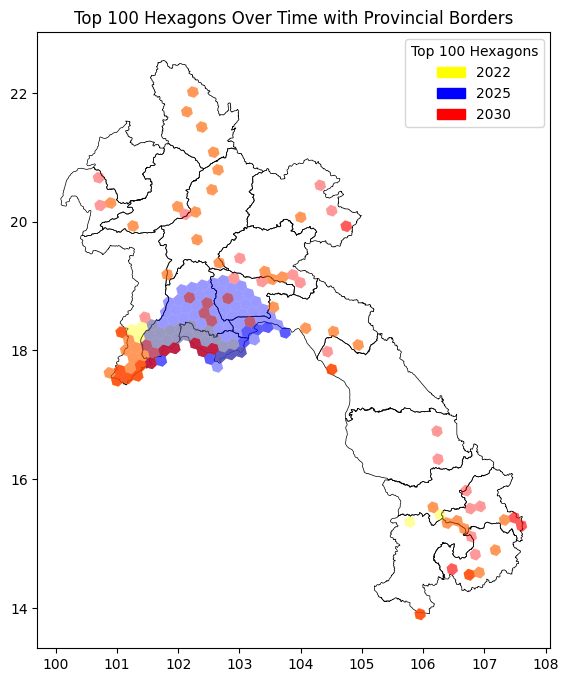

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
# gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Get the top 100 hexagons by total cost for each year
top_100_2022 = gdf_2022.nsmallest(100, 'Vientiane pipeline total cost')
top_100_2025 = gdf_2025.nsmallest(100, 'Vientiane pipeline total cost')
top_100_2030 = gdf_2030.nsmallest(100, 'Vientiane pipeline total cost')
# top_100_post_2030 = gdf_post_2030.nsmallest(100, 'Vientiane pipeline total cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Define colors for each year
colors = {
    2022: 'yellow',
    2025: 'blue',
    2030: 'red',
    # 'Post-2030': 'purple'
}

# Plot all top 100 hexagons on the same map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the provinces
provinces.to_crs(gdf_2022.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Plot each year's top 100 hexagons with different colors
top_100_2022.plot(ax=ax, color=colors[2022], label='2022', alpha=0.4)
top_100_2025.plot(ax=ax, color=colors[2025], label='2025', alpha=0.4)
top_100_2030.plot(ax=ax, color=colors[2030], label='2030', alpha=0.4)
# top_100_post_2030.plot(ax=ax, color=colors['Post-2030'], label='Post-2030', alpha=0.5)

# Manually create the legend using Patches
legend_patches = [
    Patch(color=colors[2022], label='2022'),
    Patch(color=colors[2025], label='2025'),
    Patch(color=colors[2030], label='2030'),
    # Patch(color=colors['Post-2030'], label='Post-2030')
]

plt.legend(handles=legend_patches, title="Top 100 Hexagons")
plt.title('Top 100 Hexagons Over Time with Provincial Borders')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


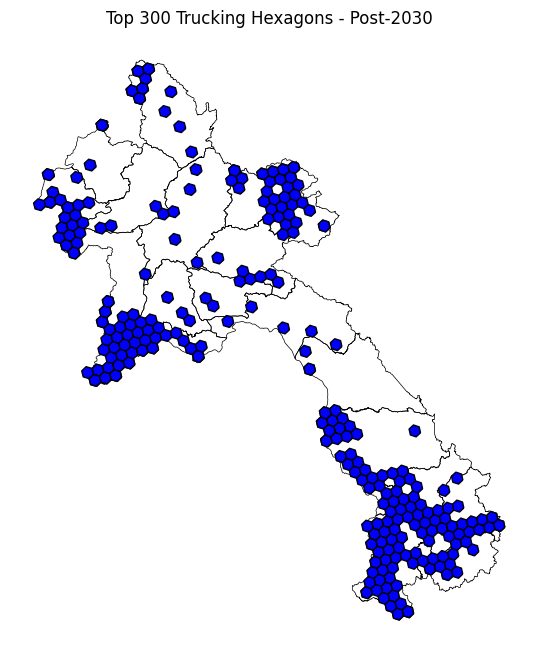

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Get the top 100 hexagons by total cost for each year
x = 300

top_100_2022 = gdf_2022.nsmallest(x, 'Vientiane trucking total cost')
top_100_2025 = gdf_2025.nsmallest(x, 'Vientiane trucking total cost')
top_100_2030 = gdf_2030.nsmallest(x, 'Vientiane trucking total cost')
top_100_post_2030 = gdf_post_2030.nsmallest(x, 'Vientiane trucking total cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Combine all data into a dictionary for easy access
hexagons_per_year = {
    2022: top_100_2022,
    2025: top_100_2025,
    2030: top_100_2030,
    'Post-2030': top_100_post_2030
}

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the province boundaries once (they don't change)
provinces.to_crs(gdf_2022.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Function to update the plot for each year
def update(year):
    ax.clear()  # Clear the previous frame
    
    # Plot the province boundaries again
    provinces.to_crs(gdf_2022.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Plot the top 100 hexagons for the current year
    hexagons_per_year[year].plot(ax=ax, color='blue', edgecolor='black')
    
    # Set the title for the current year
    ax.set_title(f'Top 300 Trucking Hexagons - {year}')
    ax.set_axis_off()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=hexagons_per_year.keys(), repeat=True)

# Save the animation as a GIF or MP4 file
ani.save('top_100_hexagons_over_time_trucking.gif', writer='imagemagick', fps=0.8)

# Or, to display inline (e.g., in a Jupyter notebook)
plt.show()


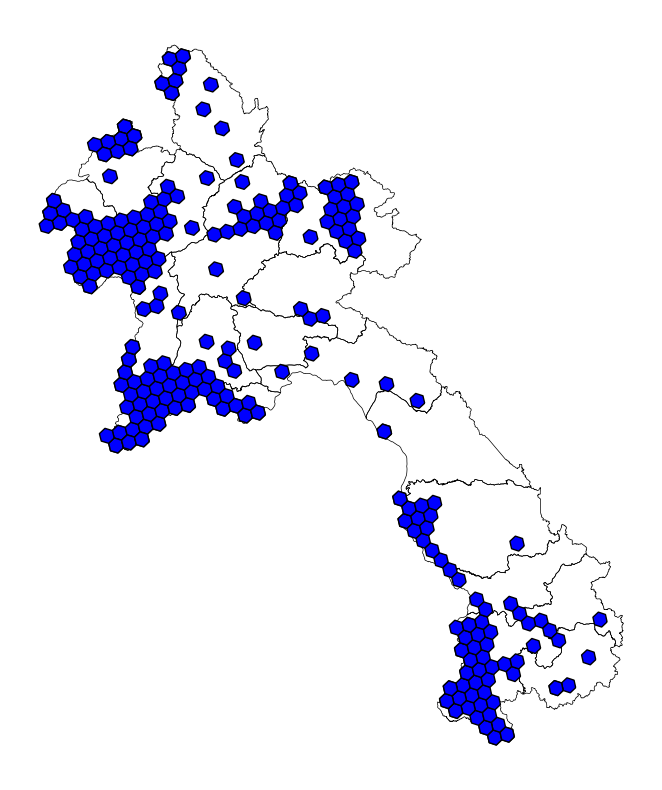

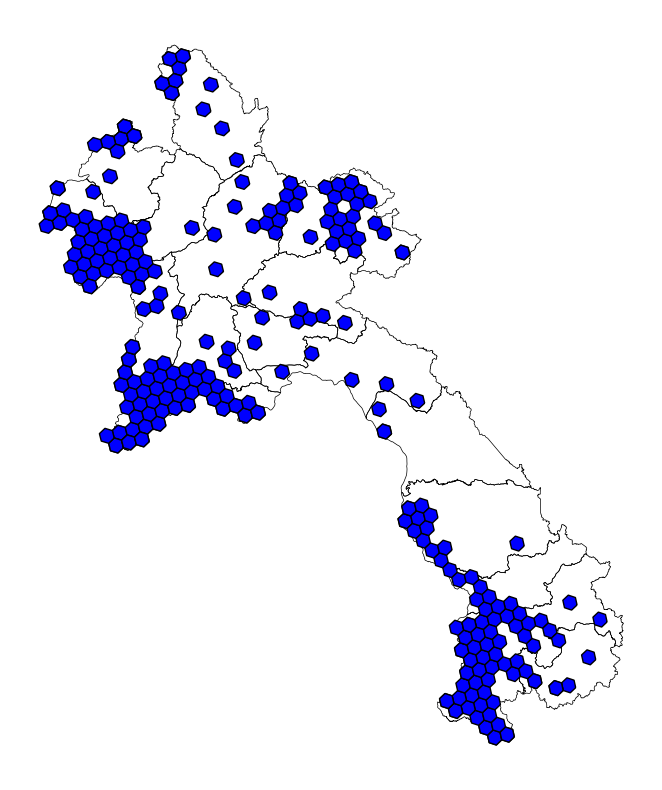

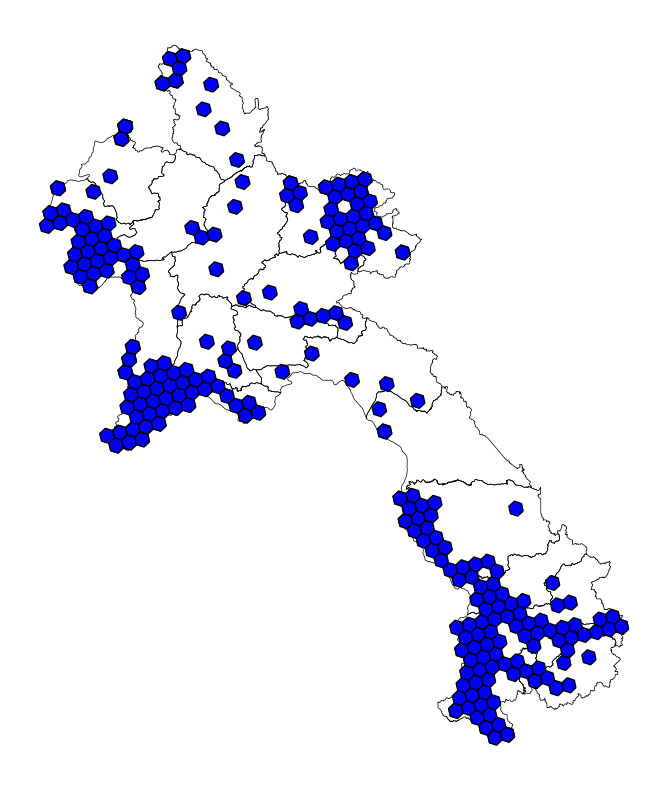

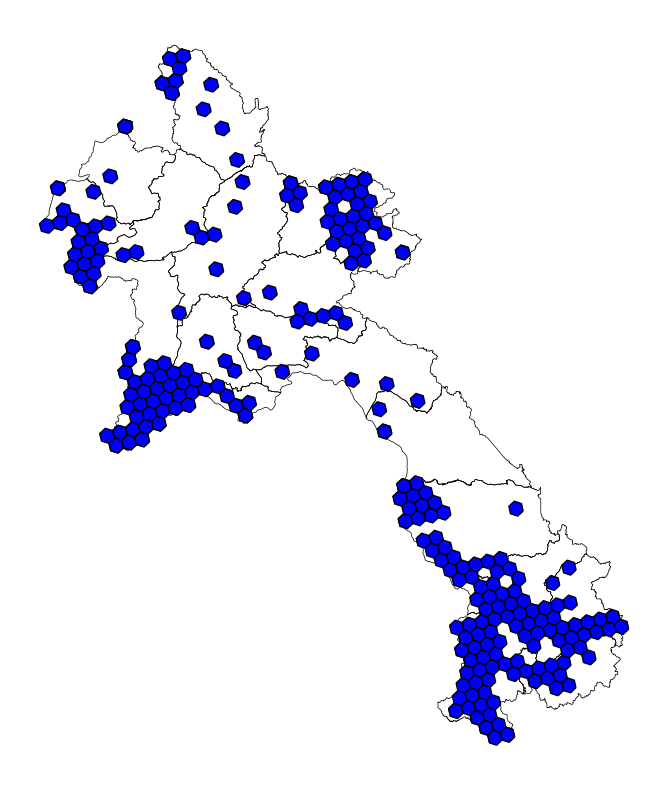

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Get the top 100 hexagons by total cost for each year
x = 300

top_100_2022 = gdf_2022.nsmallest(x, 'Vientiane trucking total cost')
top_100_2025 = gdf_2025.nsmallest(x, 'Vientiane trucking total cost')
top_100_2030 = gdf_2030.nsmallest(x, 'Vientiane trucking total cost')
top_100_post_2030 = gdf_post_2030.nsmallest(x, 'Vientiane trucking total cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Combine all data into a dictionary for easy access
hexagons_per_year = {
    2022: top_100_2022,
    2025: top_100_2025,
    2030: top_100_2030,
    'Post-2030': top_100_post_2030
}

# Loop through each year and create a plot
for year, hexagons in hexagons_per_year.items():
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Plot the province boundaries
    provinces.to_crs(gdf_2022.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Plot the top 100 hexagons for the current year
    hexagons.plot(ax=ax, color='blue', edgecolor='black')
    
    # Set the title for the current year
    # ax.set_title(f'Top 100 Hexagons - {year}')
    ax.set_axis_off()

    # Save the plot as a PNG file
    plt.tight_layout()
    plt.savefig(f'top_100_hexagons_{year}.png', dpi=300)
    
    # Show the plot
    plt.show()


In [3]:

# Get the top 300 hexagons by total cost for each year
x = 18

top_300_2022 = gdf_2022.nsmallest(x, 'Vientiane trucking total cost')
top_300_2025 = gdf_2025.nsmallest(x, 'Vientiane trucking total cost')
top_300_2030 = gdf_2030.nsmallest(x, 'Vientiane trucking total cost')
top_300_post_2030 = gdf_post_2030.nsmallest(x, 'Vientiane trucking total cost')

# Calculate and display the range for each year
years_data = {
    2022: top_300_2022,
    2025: top_300_2025,
    2030: top_300_2030,
    'Post-2030': top_300_post_2030
}

for year, data in years_data.items():
    min_value = data['Vientiane trucking total cost'].min()
    max_value = data['Vientiane trucking total cost'].max()
    print(f'Year {year}: Min = {min_value}, Max = {max_value}')

Year 2022: Min = 2.796459255608477, Max = 6.009385705766515
Year 2025: Min = 2.7957282070308502, Max = 4.339718210899718
Year 2030: Min = 2.64578570416249, Max = 3.8476618543627534
Year Post-2030: Min = 2.504275243505502, Max = 2.7497784695142786


In [20]:
gdf.columns

Index(['h3_index', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'waterbody_dist',
       'waterway_dist', 'road_dist', 'hydro', 'index', 'theo_turbines',
       'theo_pv', 'index_right_renamed', 'country',
       'Vientiane road construction costs',
       'Vientiane trucking transport and conversion costs',
       'Vientiane trucking state',
       'Vientiane pipeline transport and conversion costs',
       'Vientiane trucking solar capacity', 'Vientiane trucking wind capacity',
       'Vientiane trucking hydro capacity',
       'Vientiane trucking electrolyzer capacity',
       'Vientiane trucking battery capacity',
       'Vientiane trucking H2 storage capacity',
       'Vientiane trucking production cost',
       'Vientiane pipeline solar capacity', 'Vientiane pipeline wind capacity',
       'Vientiane pipeline hydro capacity',
       'Vientiane pipeline electrolyzer capacity',
       'Vientiane pipeline battery capacity',
       'Vientiane pipeline H2 storage capacity',
       'Vientiane p

In [49]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# List of years you want to analyze
years = ['2022', '2025', '2030', 'post_2030']

# Initialize an empty DataFrame to store the data for the violin plot
violin_data = pd.DataFrame()

# Load the data for each year and transport type
for year in years:
    # Load the GeoJSON file
    file_path = f'ratio_total/{year}/hex_cost_components.geojson'
    gdf = gpd.read_file(file_path)
    
    # Create a DataFrame for the trucking data
    temp_df = pd.DataFrame({
        'Year': year,
        'Cost': gdf['Vientiane trucking production cost']
    })
    
    # Append the data to the main DataFrame
    violin_data = pd.concat([violin_data, temp_df], ignore_index=True)

# Create the violin plot with Plotly Express
fig = px.violin(violin_data, x='Year', y='Cost', box=True, points='all', color_discrete_sequence=['black'])

# Customize the layout with a cleaner design
fig.update_layout(
    title="Distribution of Hexagon Costs for Trucking Across Years",
    title_font=dict(size=20),
    xaxis_title="Year",
    yaxis_title="LCOH ($/kg)",
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        range=[0, 25],  # Adjust the y-axis limit based on your data
        nticks=20
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False  # Remove the legend for clarity
)

# Show the plot
fig.show()


np.float64(5977.139999999999)

In [109]:
import geopandas as gpd

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Get the top 300 hexagons by total cost for each year
x = 300

top_300_2022 = gdf_2022.nsmallest(x, 'Vientiane pipeline total cost')
top_300_2025 = gdf_2025.nsmallest(x, 'Vientiane pipeline total cost')
top_300_2030 = gdf_2030.nsmallest(x, 'Vientiane pipeline total cost')
top_300_post_2030 = gdf_post_2030.nsmallest(x, 'Vientiane pipeline total cost')

# Calculate the range for each year for both pipeline and trucking
years_data = {
    2022: top_300_2022,
    2025: top_300_2025,
    2030: top_300_2030,
    'Post-2030': top_300_post_2030
}

# Start the LaTeX table string
latex_table = """
\\begin{table}[h!]
\\centering
\\begin{tabular}{|c|c|c|c|c|}
\\hline
Year & Min Pipeline Cost & Max Pipeline Cost & Min Trucking Cost & Max Trucking Cost \\\\
\\hline
"""

# Add data to the LaTeX table
for year, data in years_data.items():
    min_pipeline = data['Vientiane pipeline total cost'].min()
    max_pipeline = data['Vientiane pipeline total cost'].max()
    min_trucking = data['Vientiane trucking total cost'].min()
    max_trucking = data['Vientiane trucking total cost'].max()
    latex_table += f"{year} & {min_pipeline:.2f} & {max_pipeline:.2f} & {min_trucking:.2f} & {max_trucking:.2f} \\\\\n"

# End the LaTeX table string
latex_table += """\\hline
\\end{tabular}
\\caption{Range of Top 300 Hexagons by Vientiane Pipeline and Trucking Total Cost}
\\label{tab:top300_ranges_pipeline_trucking}
\\end{table}
"""

# Print the LaTeX table code
print(latex_table)



\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Year & Min Pipeline Cost & Max Pipeline Cost & Min Trucking Cost & Max Trucking Cost \\
\hline
2022 & 3.15 & 12.35 & 2.80 & 12.19 \\
2025 & 3.14 & 11.56 & 2.80 & 11.39 \\
2030 & 2.97 & 9.74 & 2.65 & 9.54 \\
Post-2030 & 2.72 & 8.70 & 2.50 & 8.53 \\
\hline
\end{tabular}
\caption{Range of Top 300 Hexagons by Vientiane Pipeline and Trucking Total Cost}
\label{tab:top300_ranges_pipeline_trucking}
\end{table}



# 3 Average cost between years

TypeError: '<' not supported between instances of 'str' and 'int'

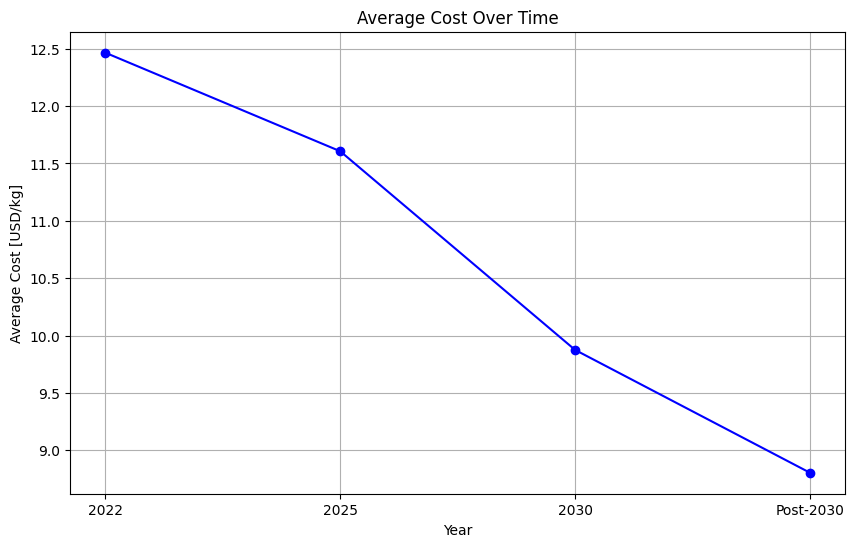

In [104]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Calculate the average cost for each year
average_costs = {
    2022: gdf_2022['Vientiane pipeline total cost'].mean(),
    2025: gdf_2025['Vientiane pipeline total cost'].mean(),
    2030: gdf_2030['Vientiane pipeline total cost'].mean(),
    'Post-2030': gdf_post_2030['Vientiane pipeline total cost'].mean()
}

# Plot the average costs over time
plt.figure(figsize=(10, 6))
years = list(average_costs.keys())
avg_cost_values = list(average_costs.values())

plt.plot(years, avg_cost_values, marker='o', linestyle='-', color='blue')
plt.title('Average Cost Over Time')
plt.xlabel('Year')
plt.ylabel('Average Cost [USD/kg]')
plt.grid(True)
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.show()


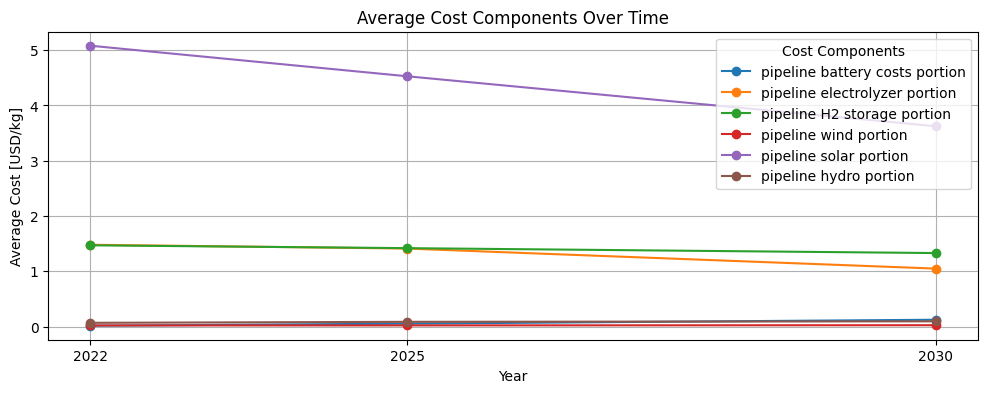

In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoJSON files for each year
gdf_2022 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2022\hex_cost_components.geojson')
gdf_2025 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2025\hex_cost_components.geojson')
gdf_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\2030\hex_cost_components.geojson')
gdf_post_2030 = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Temporal\ratio_total\post_2030\hex_cost_components.geojson')

# Define the cost components to analyze
cost_components = [
    'Vientiane LCOH - pipeline battery costs portion',
    'Vientiane LCOH - pipeline electrolyzer portion',
    'Vientiane LCOH - pipeline H2 storage portion',
    'Vientiane LCOH - pipeline wind portion',
    'Vientiane LCOH - pipeline solar portion',
    'Vientiane LCOH - pipeline hydro portion'
]

# Calculate the average cost for each component and year
average_costs = {component: [] for component in cost_components}

for component in cost_components:
    average_costs[component].append(gdf_2022[component].mean())
    average_costs[component].append(gdf_2025[component].mean())
    average_costs[component].append(gdf_2030[component].mean())
    # average_costs[component].append(gdf_post_2030[component].mean())

# Plot the average costs for each component over time
plt.figure(figsize=(12, 4))
# years = [2022, 2025, 2030, 'Post-2030']
years = [2022, 2025, 2030]

for component, values in average_costs.items():
    plt.plot(years, values, marker='o', linestyle='-', label=component.split(" - ")[1])

plt.title('Average Cost Components Over Time')
plt.xlabel('Year')
plt.ylabel('Average Cost [USD/kg]')
plt.grid(True)
plt.xticks(years)  # Ensure all years are shown on the x-axis
plt.legend(title="Cost Components")
plt.show()
